1. Commonly used for text similarity,document clustering and information retrieval.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#documents=["I love machine learning","Machine learning is great", "I enjoy learning new thing"]
with open('/Users/sourajitpal/Downloads/wwdc202324.txt', 'r') as fh:
    documents = [line.strip() for line in fh]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
cosine_sim = cosine_similarity(tfidf_matrix)  

print("Sparse Matrix : \n", tfidf_matrix)
print("Dense Matrix with cosine similarity : \n", cosine_sim)

Sparse Matrix : 
   (0, 281)	0.6222180914356057
  (0, 628)	0.7828439478531033
  (1, 151)	0.17257934812683887
  (1, 408)	0.10333640856885755
  (1, 353)	0.17257934812683887
  (1, 592)	0.17257934812683887
  (1, 624)	0.11900569702848533
  (1, 49)	0.1457925225776621
  (1, 425)	0.17257934812683887
  (1, 402)	0.0973792215750591
  (1, 379)	0.15691005966721103
  (1, 603)	0.17257934812683887
  (1, 374)	0.17257934812683887
  (1, 527)	0.15691005966721103
  (1, 86)	0.2915850451553242
  (1, 54)	0.17257934812683887
  (1, 421)	0.15691005966721103
  (1, 53)	0.1301232341180343
  (1, 332)	0.1371690908605355
  (1, 268)	0.1457925225776621
  (1, 619)	0.08170993311543132
  (1, 196)	0.15691005966721103
  (1, 609)	0.15691005966721103
  (1, 545)	0.14399566329920394
  (1, 339)	0.17257934812683887
  :	:
  (62, 43)	0.07227387610632412
  (62, 548)	0.0898128141373748
  (62, 216)	0.08519946999342165
  (62, 584)	0.1703989399868433
  (62, 348)	0.1703989399868433
  (62, 606)	0.09545909104405845
  (62, 271)	0.10273840802

2. Imagine intuitively understanding document similarity through visual representation 

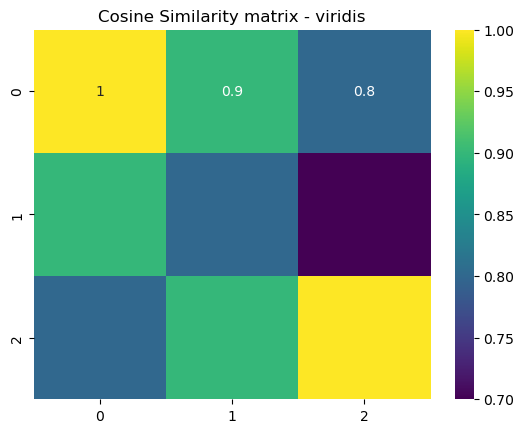

In [2]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#Example cosine similarity matrix 
cosine_sim = np.array([
    [1.0,0.9,0.8],
    [0.9,0.8,0.7],
    [0.8,0.9,1.0]
])
color_maps = ['viridis']

#Plotting the heatmap with different color maps
for cmap in color_maps:
    sns.heatmap(cosine_sim, annot=True, cmap=cmap)
    plt.title(f'Cosine Similarity matrix - {cmap}')
    plt.show()

3. High-dimensional sparse vectors can be computationally expensive.
   Highlighting the limitation with BOW:

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(documents)
cosine_sim_bow = cosine_similarity(bow_matrix)

print(cosine_sim_bow) # Observe difference with TF-IDF results


[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.29095719 0.40496194]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.29095719 0.         ... 0.         1.         0.3917734 ]
 [0.         0.40496194 0.         ... 0.         0.3917734  1.        ]]


4. Demonstrating uses in a simple search query

In [4]:
query = ['macbook']
query_vec = vectorizer.transform(query)
cosine_sim_query = cosine_similarity(query_vec, tfidf_matrix)

print (cosine_sim_query) #find documents most similar to the query

[[0.         0.         0.         0.09566329 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.26103392 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


5. Using pre-trained models like Word2Vec or BERT. Using sentence transformer for better semantic similarity:

In [ ]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util
#Sample documents 
documents = ["I love machine learning","Machine learning is great", "I enjoy learning new thing"]

#Load the pre-trained model 
model = SentenceTransformer('all-MiniLM-L6-v2')

#Encode the document as embeddings 
embeddings = model.encode(documents, convert_to_tensor=True)

#Compute cosine similarity between the embeddings 
cosine_sim_embeddings = util.pytorch_cos_sim(embeddings, embeddings)

print(cosine_sim_embeddings)

/opt/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/opt/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


6. Apply cosine similarity in 1. preprocessing, 2. vectorization, 3. similarity computation, for larger NLP pipelines. Example: Search Engine, recommendation systems and clustering.

In [1]:
# Step 1 : Preprocess text
documents=["I love machine learning","Machine learning is great", "I enjoy learning new thing"]

# Step 2 : Vectorize text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix=vectorizer.fit_transform(documents)

# Step 3 : Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Step 4 : Using results for further processing (example: information retrieval)
query = ["machine learning"]
query_vec = vectorizer.transform(query)
cosine_sim_query = cosine_similarity(query_vec, tfidf_matrix)

print(cosine_sim)
print(cosine_sim_query)

[[1.         0.39038344 0.13730861]
 [0.39038344 1.         0.11141304]
 [0.13730861 0.11141304 1.        ]]
[[0.69362794 0.56281389 0.19795715]]
